Select a stock:
1. AAPL
2. MSFT
3. GOOGL
4. AMZN
5. TSLA
Enter the number corresponding to the stock: 5
[*********************100%%**********************]  1 of 1 completed


<ipython-input-13-64c68441092c>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Prediction'], 1))[:-window_size]


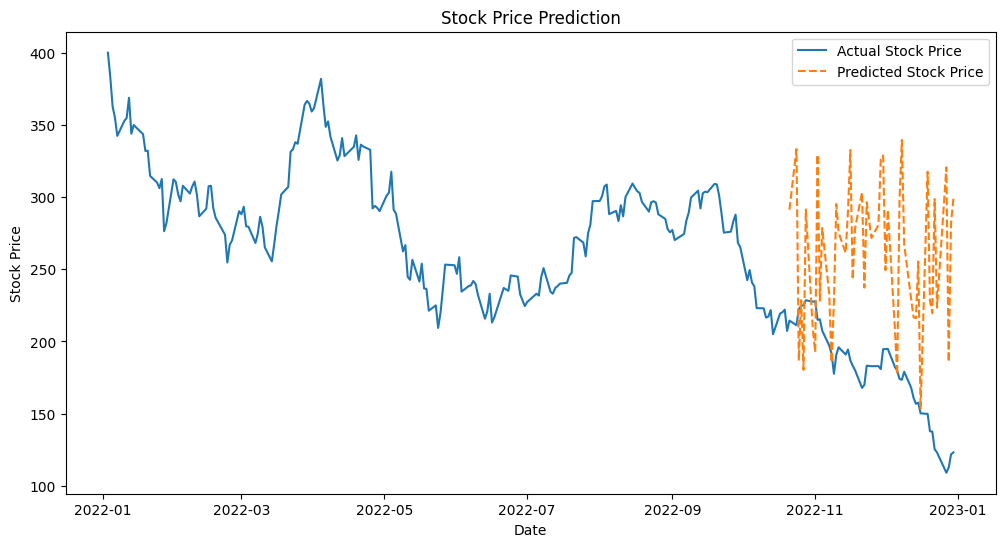

Predicted: 291.1837232463731, Actual: 273.84332275390625
Predicted: 333.23733804572925, Actual: 312.4700012207031
Predicted: 186.65756660854694, Actual: 182.4499969482422
Predicted: 228.55431178966, Actual: 190.9499969482422
Predicted: 180.39102163467186, Actual: 123.1500015258789
Model Accuracy: 0.748464899839332


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import yfinance as yf

# Load historical stock data from Yahoo Finance
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Prepare features and target variable
def prepare_data(data, window_size=10):
    data['Prediction'] = data['Close'].shift(-window_size)
    X = np.array(data.drop(['Prediction'], 1))[:-window_size]
    y = np.array(data['Prediction'])[:-window_size]
    return X, y

# Split data into training and testing sets
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Build and train the model
def build_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Visualize the stock data and predictions
# Visualize the stock data and predictions
def visualize_data(data, prediction):
    plt.figure(figsize=(12, 6))
    # Extract dates from the index for x-axis
    dates = data.index[-len(prediction):]
    # Plot actual and predicted prices
    plt.plot(dates, data['Close'][-len(prediction):], label='Actual Stock Price')
    plt.plot(dates, prediction, label='Predicted Stock Price', linestyle='dashed')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction')
    plt.legend()
    plt.show()


# Main function for stock prediction
def predict_stock_price(ticker, start_date, end_date, visualize=True):
    # Load data
    data = load_stock_data(ticker, start_date, end_date)

    # Prepare data
    X, y = prepare_data(data)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Build and train the model
    model = build_model(X_train, y_train)

    # Make predictions
    prediction = model.predict(X_test)

    # Visualize the data and predictions
    if visualize:
        visualize_data(data, np.append([np.nan]*(len(data) - len(prediction)), prediction))

    # Print the first few predictions and actual values
    for i in range(5):
        print(f"Predicted: {prediction[i]}, Actual: {y_test[i]}")

    # Calculate model accuracy (R-squared score)
    accuracy = model.score(X_test, y_test)
    print(f"Model Accuracy: {accuracy}")

# Function to select specific stock from a list
def select_stock():
    stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]  # Example stock symbols
    print("Select a stock:")
    for i, stock in enumerate(stocks):
        print(f"{i + 1}. {stock}")
    choice = int(input("Enter the number corresponding to the stock: ")) - 1
    return stocks[choice]

# Example usage
if __name__ == "__main__":
    # Select a stock
    selected_stock = select_stock()

    # Define start date and end date
    start_date = "2022-01-01"
    end_date = "2022-12-31"

    # Predict and visualize stock prices
    predict_stock_price(selected_stock, start_date, end_date)
